In [2]:
!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=5c6f437265ec109df0c27487e32e1321f07b6bda72e4b7d5ffe0dd3f649a1557
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [7]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
file = open('auto-mpg.data', 'r')
fileread = file.readlines()

In [12]:
data_of_data = []
for item in fileread:
    data = []
    item = item.replace("\n", "")
    item = item.replace("\t", " ")
    item = item.split(' ')
    for subitem in item:
        if subitem != "":
            data.append(subitem)
    data_of_data.append(data)


In [13]:
new_data_of_data = []
for item in data_of_data:
    new_data = item[:8]
    item = ' '.join(subitem.replace('"', '') for subitem in item[8:])
    new_data.append(item)
    new_data_of_data.append(new_data)

In [15]:
print(new_data_of_data)

[['18.0', '8', '307.0', '130.0', '3504.', '12.0', '70', '1', 'chevrolet chevelle malibu'], ['15.0', '8', '350.0', '165.0', '3693.', '11.5', '70', '1', 'buick skylark 320'], ['18.0', '8', '318.0', '150.0', '3436.', '11.0', '70', '1', 'plymouth satellite'], ['16.0', '8', '304.0', '150.0', '3433.', '12.0', '70', '1', 'amc rebel sst'], ['17.0', '8', '302.0', '140.0', '3449.', '10.5', '70', '1', 'ford torino'], ['15.0', '8', '429.0', '198.0', '4341.', '10.0', '70', '1', 'ford galaxie 500'], ['14.0', '8', '454.0', '220.0', '4354.', '9.0', '70', '1', 'chevrolet impala'], ['14.0', '8', '440.0', '215.0', '4312.', '8.5', '70', '1', 'plymouth fury iii'], ['14.0', '8', '455.0', '225.0', '4425.', '10.0', '70', '1', 'pontiac catalina'], ['15.0', '8', '390.0', '190.0', '3850.', '8.5', '70', '1', 'amc ambassador dpl'], ['15.0', '8', '383.0', '170.0', '3563.', '10.0', '70', '1', 'dodge challenger se'], ['14.0', '8', '340.0', '160.0', '3609.', '8.0', '70', '1', "plymouth 'cuda 340"], ['15.0', '8', '400.

In [20]:
file = open('auto-mpg.names', 'r')
fileread = file.read()
#fileread = fileread.split('\n')

In [24]:
column_values = fileread.split('Attribute Information:')[1]
column_values = column_values.split('\n')
column_values

['',
 '',
 '    1. mpg:           continuous',
 '    2. cylinders:     multi-valued discrete',
 '    3. displacement:  continuous',
 '    4. horsepower:    continuous',
 '    5. weight:        continuous',
 '    6. acceleration:  continuous',
 '    7. model year:    multi-valued discrete',
 '    8. origin:        multi-valued discrete',
 '    9. car name:      string (unique for each instance)',
 '',
 '8. Missing Attribute Values:  horsepower has 6 missing values',
 '',
 '']

In [40]:
columns = []
for col in column_values[2:-4]:
    strip_col = col.strip()
    split_col = strip_col.split(':')[0].split('.')[1].strip()
    columns.append(split_col)
    

In [41]:
print(columns)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


In [48]:
cars_df = pd.DataFrame(data = new_data_of_data, columns = columns)
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino


In [50]:
cars_df.to_csv('cars_df.csv', index = False)

In [54]:
cars_df.columns = ["mpg", "cyl", "disp", "hp", "wt","acc", "year", "org", "name"]

In [55]:
cars_df.head()

,mpg,cyl,disp,hp,wt,acc,year,org,name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino


In [57]:
cars_df.shape

(398, 9)

In [58]:
clean_cars_df = cars_df.loc[~(cars_df['hp'] == "?")]

In [59]:
clean_cars_df

,mpg,cyl,disp,hp,wt,acc,year,org,name
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.,15.6,82,1,ford mustang gl
394,44.0,4,97.00,52.00,2130.,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.,18.6,82,1,ford ranger


# Boxplot for disp column

In [60]:
clean_cars_df['disp']

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
393    140.0
394    97.00
395    135.0
396    120.0
397    119.0
Name: disp, Length: 392, dtype: object

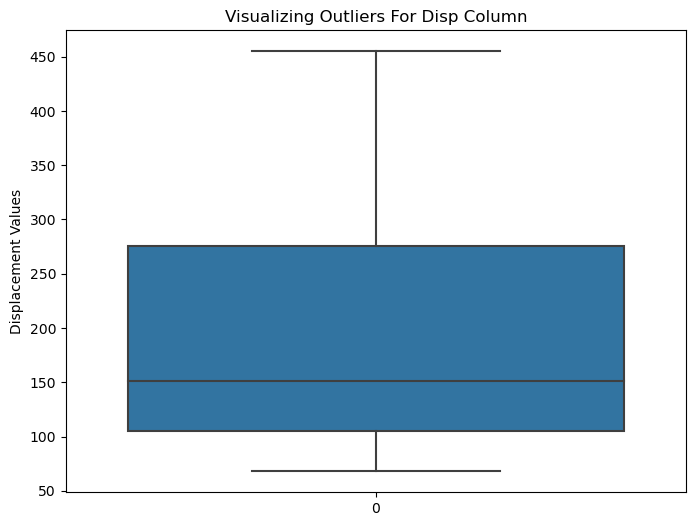

In [73]:
import seaborn as sns
plt.figure(figsize = (8, 6))
sns.boxplot(data = clean_cars_df['disp'])
plt.title("Visualizing Outliers For Disp Column")
plt.ylabel("Displacement Values")
plt.show()

## Boxplot For hp column

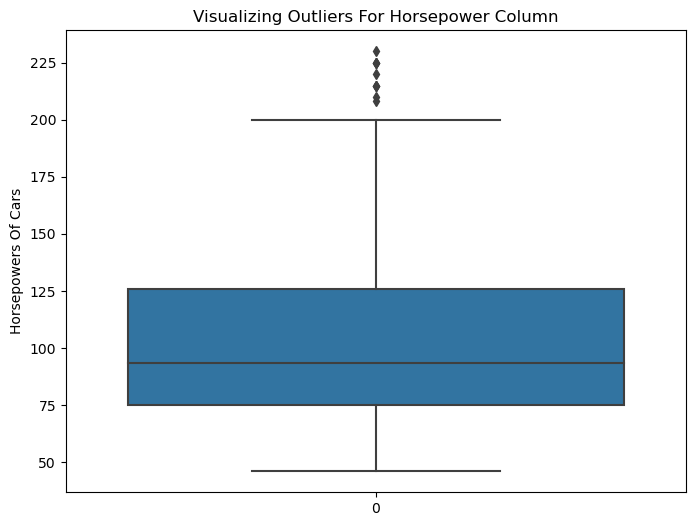

In [75]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = clean_cars_df['hp'])
plt.title("Visualizing Outliers For Horsepower Column")
plt.ylabel("Horsepowers Of Cars")
plt.show()

## Boxplot For Weight  column

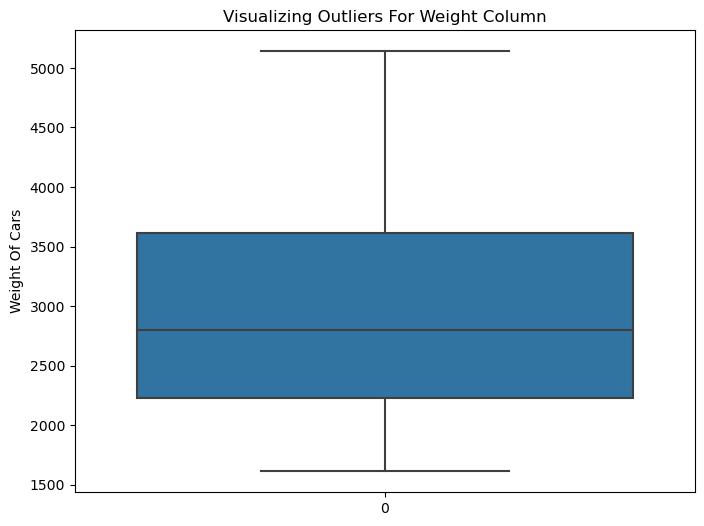

In [78]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = clean_cars_df['wt'])
plt.title("Visualizing Outliers For Weight Column")
plt.ylabel("Weight Of Cars")
plt.show()

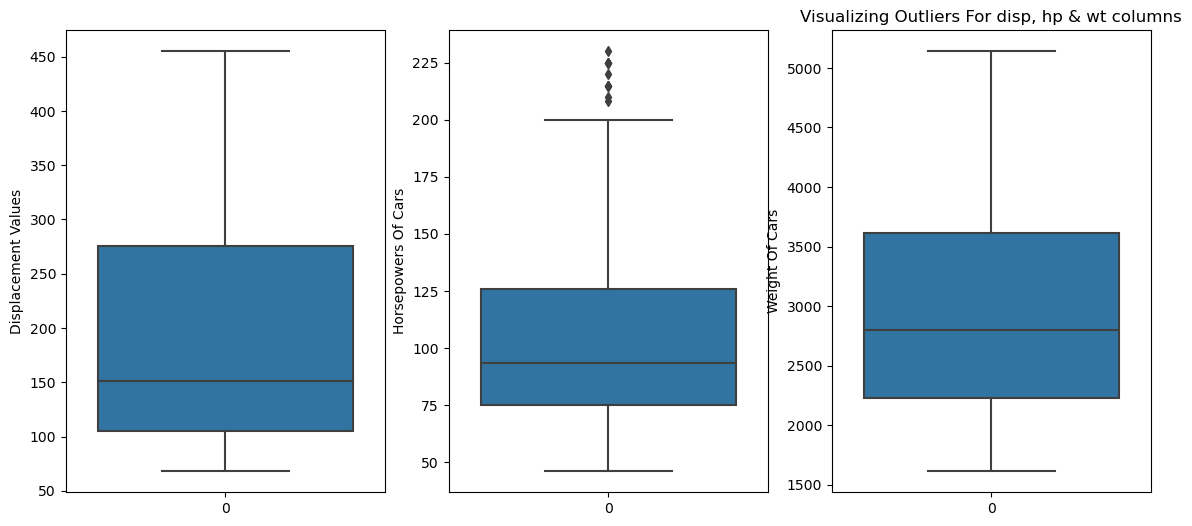

In [80]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data = clean_cars_df['disp'])
plt.ylabel("Displacement Values")

plt.subplot(1, 3, 2)
sns.boxplot(data = clean_cars_df['hp'])
plt.ylabel("Horsepowers Of Cars")

plt.subplot(1, 3, 3)
sns.boxplot(data = clean_cars_df['wt'])
plt.ylabel("Weight Of Cars")

plt.title('Visualizing Outliers For disp, hp & wt columns')

plt.show()

# Creating regression Model for disp anf mpg

In [82]:
final_df = clean_cars_df[['mpg', 'disp', 'hp', 'wt']]
final_df.head()

,mpg,disp,hp,wt
0,18.0,307.0,130.0,3504.
1,15.0,350.0,165.0,3693.
2,18.0,318.0,150.0,3436.
3,16.0,304.0,150.0,3433.
4,17.0,302.0,140.0,3449.


In [83]:
final_df.info() # is in string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mpg     392 non-null    object
 1   disp    392 non-null    object
 2   hp      392 non-null    object
 3   wt      392 non-null    object
dtypes: object(4)
memory usage: 23.4+ KB


In [84]:
final_df = final_df.astype('float64')
final_df

,mpg,disp,hp,wt
0,18.0,307.0,130.0,3504.0
1,15.0,350.0,165.0,3693.0
2,18.0,318.0,150.0,3436.0
3,16.0,304.0,150.0,3433.0
4,17.0,302.0,140.0,3449.0
...,...,...,...,...
393,27.0,140.0,86.0,2790.0
394,44.0,97.0,52.0,2130.0
395,32.0,135.0,84.0,2295.0
396,28.0,120.0,79.0,2625.0


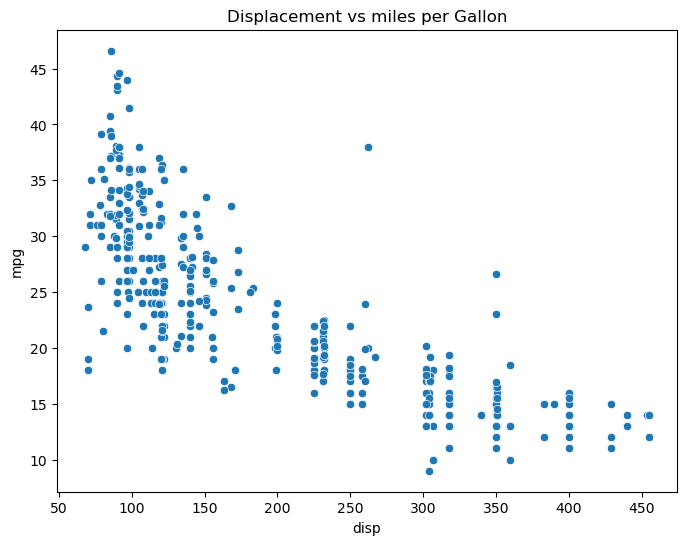

In [86]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = final_df, x = 'disp', y = 'mpg')
plt.title('Displacement vs miles per Gallon')
plt.show()

In [87]:
sns.kdeplot

<function seaborn.distributions.kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, warn_singular=True, **kwargs)>

In [88]:
# data = independent feature
 # lablel =target value
data = final_df[['disp']]
label = final_df['mpg']

In [89]:
from sklearn.model_selection import train_test_split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state= 42)

In [110]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(313, 1)
(79, 1)
(313,)
(79,)


In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
lr = LinearRegression()

In [113]:
lr.fit(x_train , y_train)

LinearRegression()

In [114]:
lr.coef_   # coefficient ayo    B1 ko value i.e slope

array([-0.06222756])

In [115]:
lr.intercept_   # B0 ko value

35.765941772604975

In [116]:
y_pred  =  lr.predict(x_test) 
print(y_pred)

[29.79209635 28.23640744 30.10323413 30.10323413 27.05408386 29.72986879
 10.87491917 29.72986879 21.76474156 31.53446793 11.49719474 26.05844296
 13.986297   29.72986879 25.62285006 28.79645545 23.44488559 29.04536567
 28.23640744 28.17417988 23.44488559 29.72986879 30.10323413 16.66208193
 30.84996481 29.66764124 28.29863499 21.76474156 29.72986879 28.23640744
 13.986297   21.32914867 19.15118419 28.29863499 10.87491917 30.10323413
 16.97321971 29.69875501 16.97321971 13.36402143 16.66208193 30.16546169
 29.23204834 29.72986879 13.92406944  8.38581691 20.20905265 30.10323413
 27.05408386 30.16546169 13.92406944 28.73422789 27.05408386 28.29863499
 21.32914867 19.7112322  19.46232197 21.32914867 29.2942759  28.73422789
  7.45240357 21.32914867 25.0005745  28.29863499 27.4274492  28.54754522
 27.05408386 30.16546169 19.58677708  9.07032004 27.05408386 13.986297
 26.68071852 31.41001282 21.76474156 29.66764124 13.986297   16.8487646
 29.72986879]


In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [118]:
mean_squared_error(y_test, y_pred, squared = False)

4.607329409713548

In [119]:
mean_absolute_error(y_test, y_pred)

3.6868230512247835

In [121]:
r2_score(y_test, y_pred)

0.5841057656051312

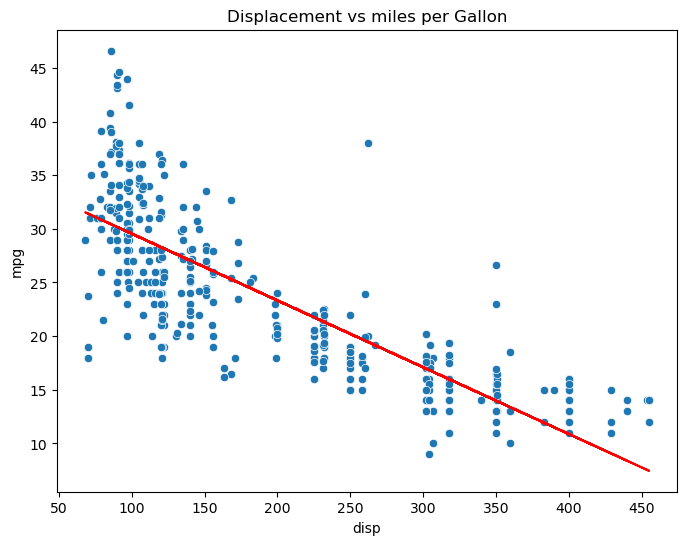

In [128]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = final_df, x = 'disp', y = 'mpg')
plt.plot(x_test, y_pred, color = 'red')

plt.title('Displacement vs miles per Gallon')
plt.show()

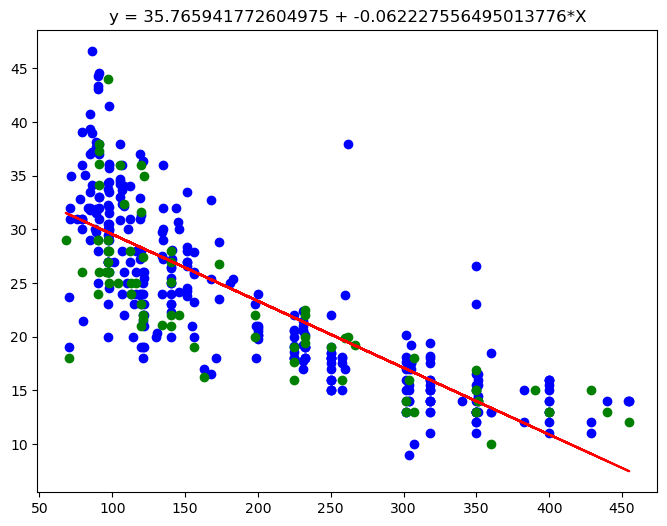

In [135]:
plt.figure(figsize = (8,6))
#sns.scatterplot(data = final_df, x = 'disp', y = 'mpg')
plt.scatter(x = x_train, y = y_train, color = 'blue')
plt.scatter(x = x_test, y = y_test, color = 'green')
plt.plot(x_test, y_pred, color = 'red')
plt.title("y = {} + {}*X".format(lr.intercept_, lr.coef_[0]))
#plt.title('Displacement vs miles per Gallon')
plt.show()

# Creating Regression Model for hp and mg

<AxesSubplot:>

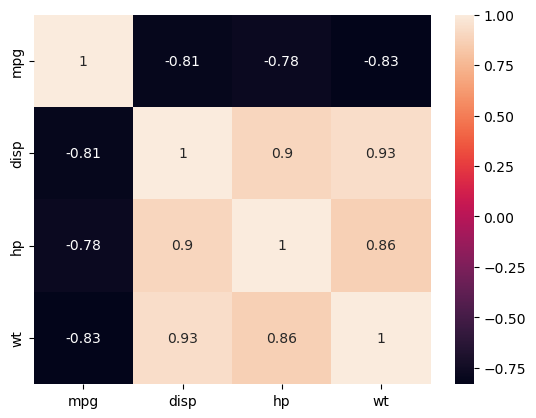

In [138]:
sns.heatmap(final_df.corr(), annot=True)